# Standard and Canonical Forms of LPP

The **standard form** of a linear programming problem (LPP) is to **maximize** the objective function:

$$
F(X)=c_1x_1+c_2x_2+\cdots+c_nx_n=\sum_{j=1}^{n}{c_jx_j}\rightarrow \max_{X \in G}, \tag{1} \label{obj_func_1}
$$

where $G$ is a **feasible region** defined by the following **inequality constraints**:

$$a_{i1}x_1+\cdots+a_{in}x_n=\sum_{j=1}^{n}{a_jx_j} \leqslant b_i,\,i=\overline{1,m}, \tag{2} \label{constr_2}$$

and the **decision variables** should be non-negative:

$$x_j \geqslant 0, \, j=\overline{1,n}.  \tag{3} \label{constr_3}$$

If in task (1)-(3), constraints (2) are replaced with eauatilies, the task acquires the **canonical form**:

$$
a_{i1}x_1+\cdots+a_{in}x_n=\sum_{j=1}^{n}{a_jx_j} = b_i,\,i=\overline{1,m}, \tag{4} \label{constr_4}
$$

The **simplex method** described below is applicable for LPPs represented in the canonical form.

# Example 1

## Task Statement

Maximize of the following objective function:

$$
F(X)=x_1 - 2 x_2 \rightarrow \max_{X \in G},
$$

where the feasible region $G$ is defined by the constraints:

$$
\begin{cases}
x_1 - x_2 \leqslant 3, \\
-3 x_1 + 4 x_2 \leqslant 12,\\
x_1 \leqslant 5, \\
x_1 \geqslant 0, \, x_2 \geqslant 0.
\end{cases}
$$

## Solutions

### Graphical Method

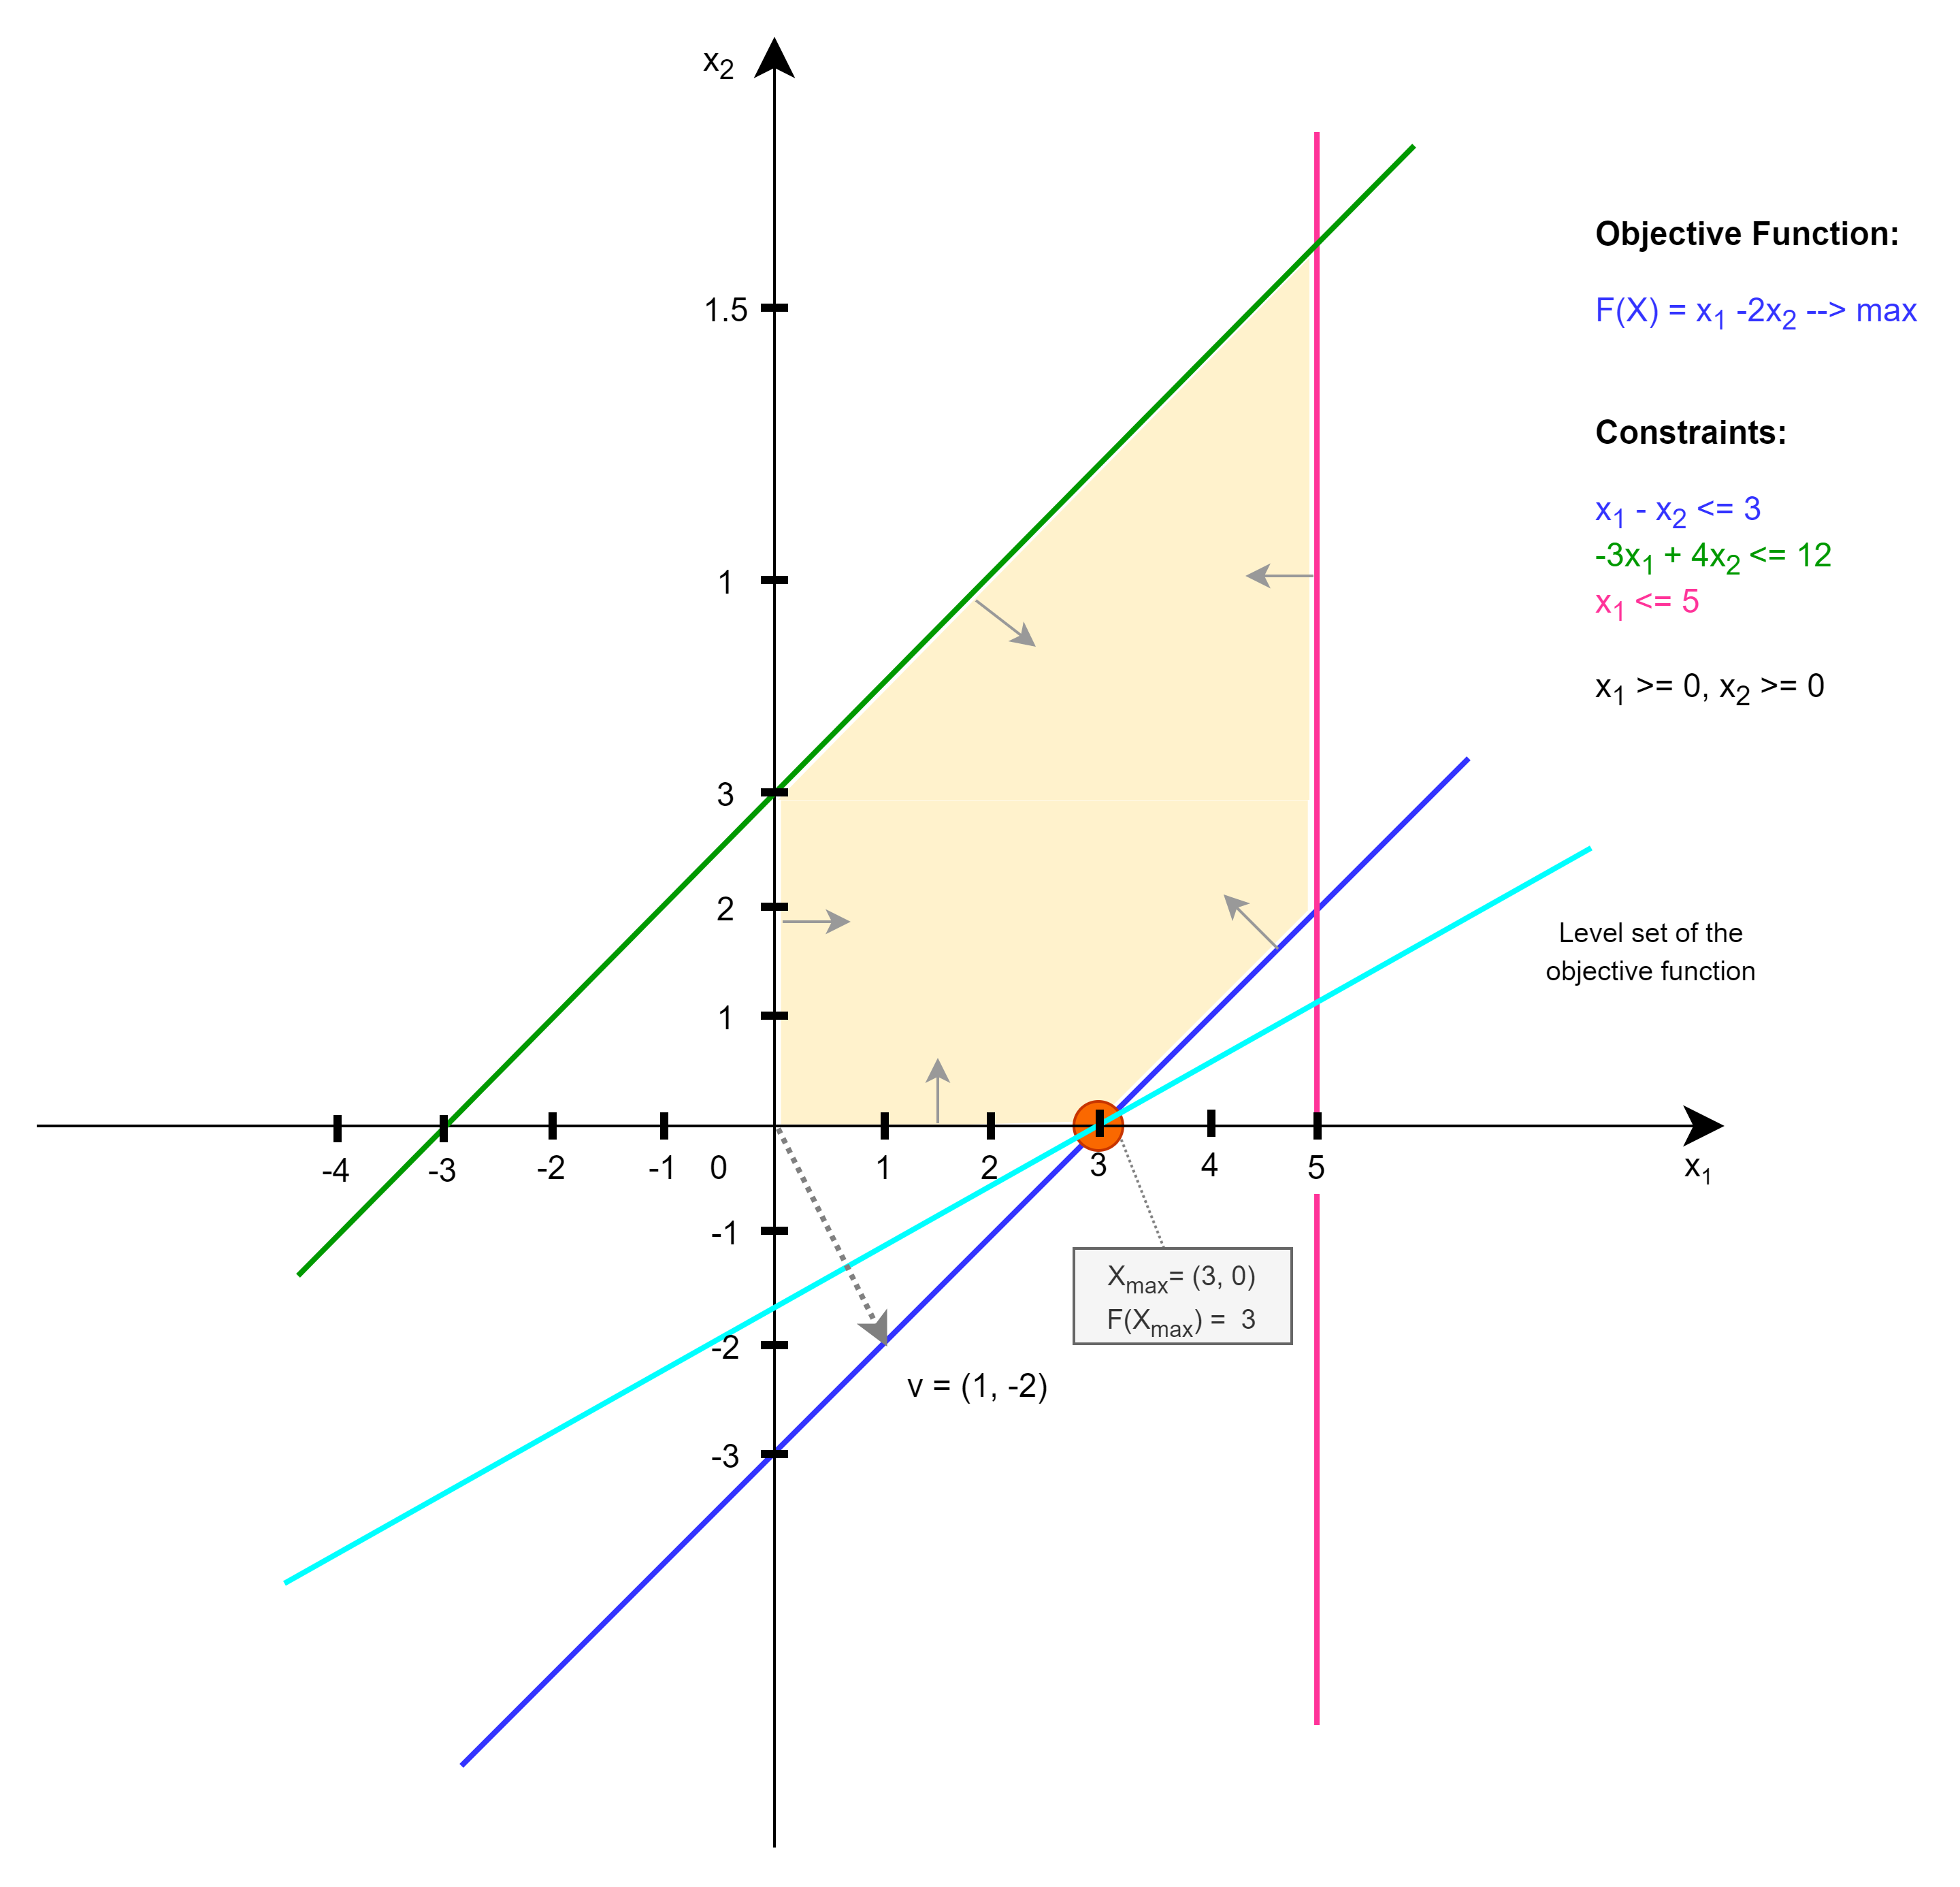

### Simplex Method

Let's convert the task to the **canonical form** by adding non-negative artificial variables $s_1$, $s_2$, $s_3$ (so-called
**slack variables**):

$$
\begin{cases}
\begin{matrix}
x_1    & - & x_2   & + & s_1 & = & 3, \\
-3 x_1 & + & 4 x_2 & + & s_2 & = & 12, \\
x_1    &   &       & + & s_3 & = & 5        
\end{matrix}
\end{cases}
$$

where all the decision variables (including the slack variables) are non-negative:

$$x_j \geqslant 0, \, j=\overline{1,2}; \, s_k \geqslant 0, \, k=\overline{1,3}.$$

Also, let's receive an equestion by moving the right part of the objective function to the left:

$$
f = x_1 - 2 x_2, \\
-(x_1 - 2 x_2) + f= 0.
$$

As the result, we've got the following LPP:

$$
\begin{cases}
\begin{matrix}
x_1    & - & x_2   & + & s_1 & = & 3,  \\
-3 x_1 & + & 4 x_2 & + & s_2 & = & 12, \\
x_1    &   &       & + & s_3 & = & 5,  \\
-x_1   & + & 2 x_2 & + & f   & = & 0.
\end{matrix}
\end{cases}
$$

Now, we create a simplex table:

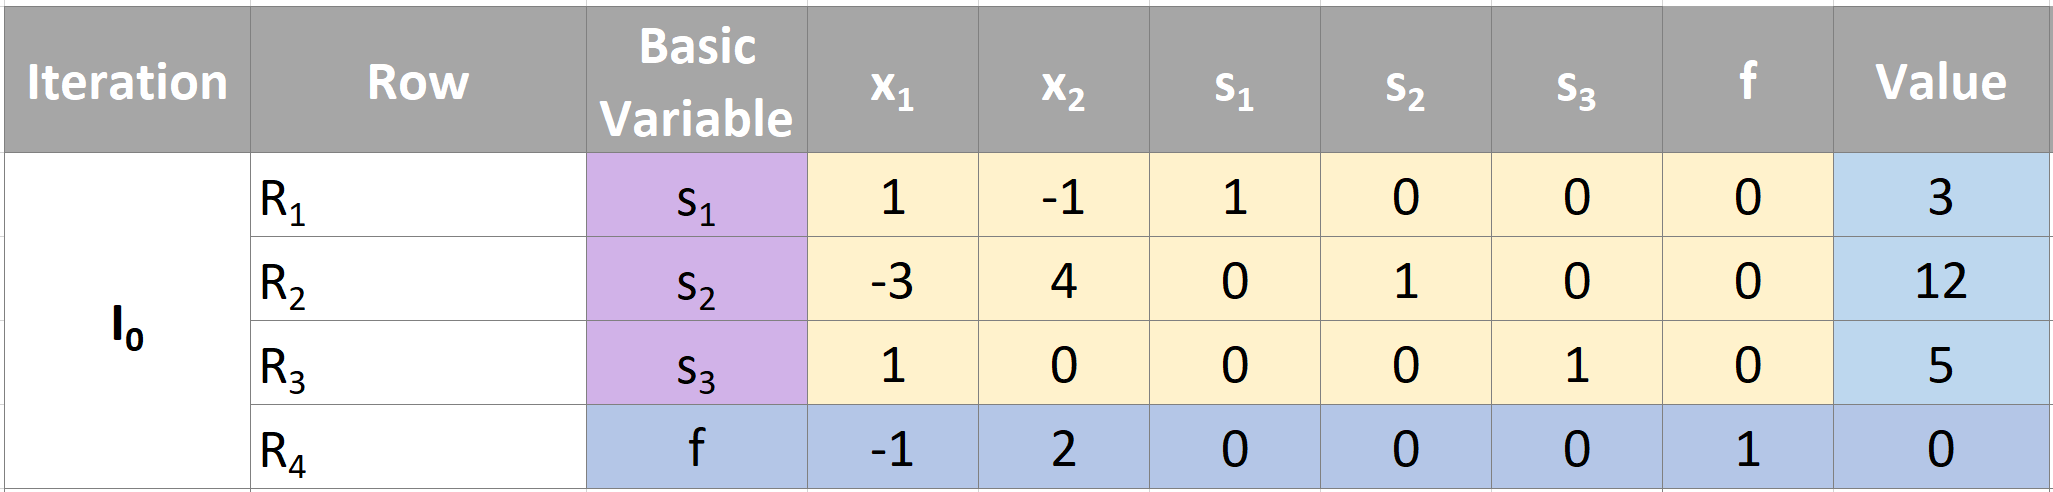

Let's find the least negative value (if any) in the objective function row ($R_4$). As we can see, this is the coeficient near $x_1$:

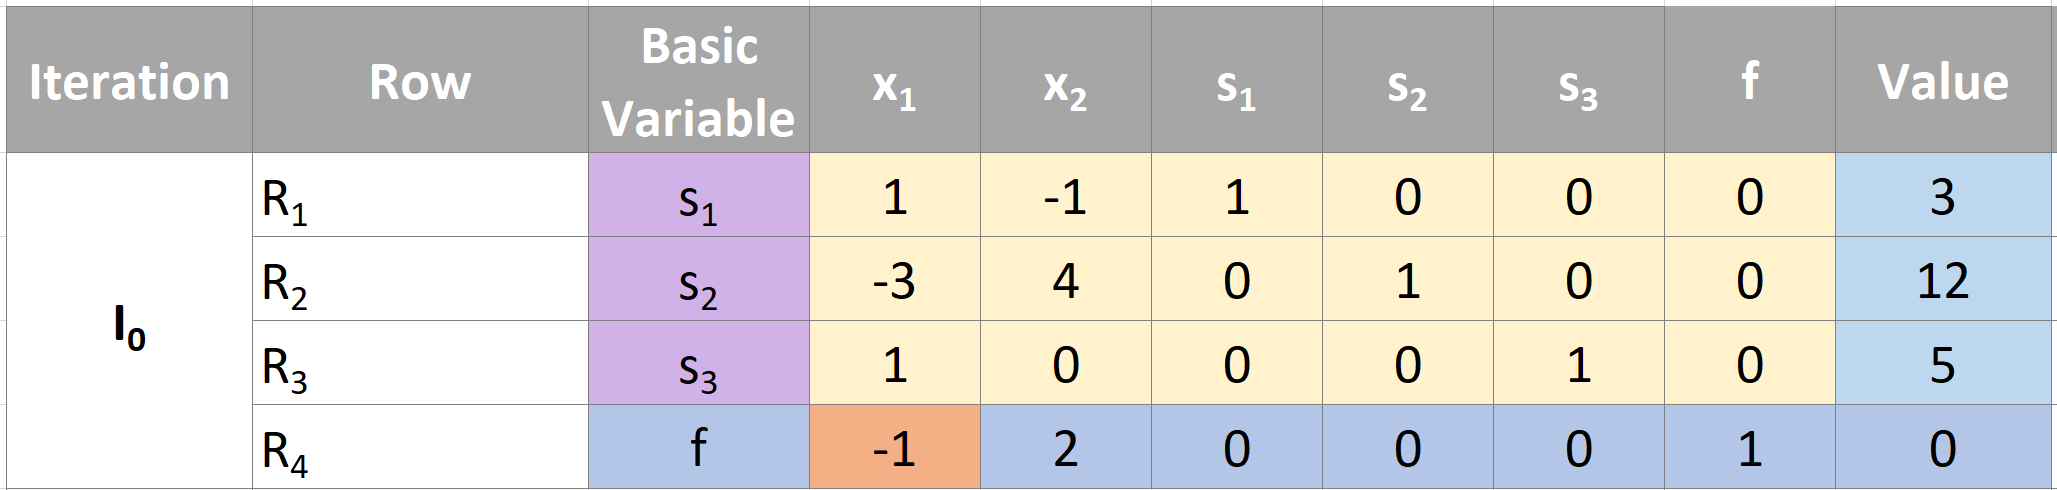

$x_1$ is called the pivot column. Then, we need to find the pivot element. To do this, it is necessary to calcualte $\theta$ value for $R_1$, $R_2$, and $R_3$ rows:
$$
\theta^i = \frac{(Value)^i}{(x_1)^i}, \, i=\overline{1,3},
$$
$(x_1)^i$ is a value in column $x_1$ and row $R_i$, and $(Value)^i$ is a value in row $R_i$. <br>

The pivot element corresponds the least non-negative value of $\theta^i$, and it is the element in $R_1$:

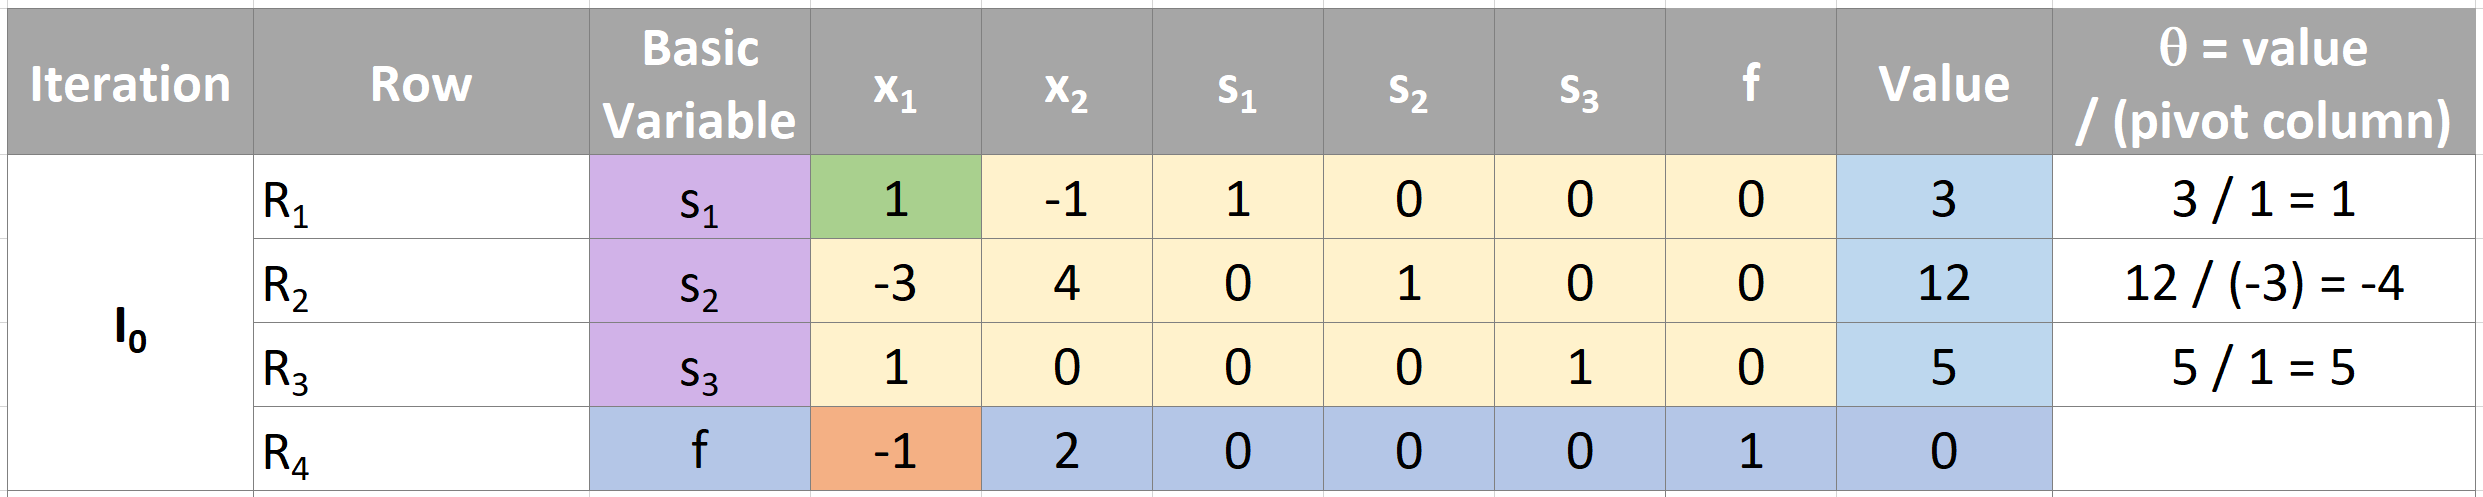

Now, we have to replace basic variable $s_1$ with $x_1$. To acheive this, we need to recalculate the simplex table in the way that the pivot element $(x_1)^1$ equals $1$, and the other values in the pivot column equal $0$. For that, we use the approach **similar to the Gausian elimination method**:

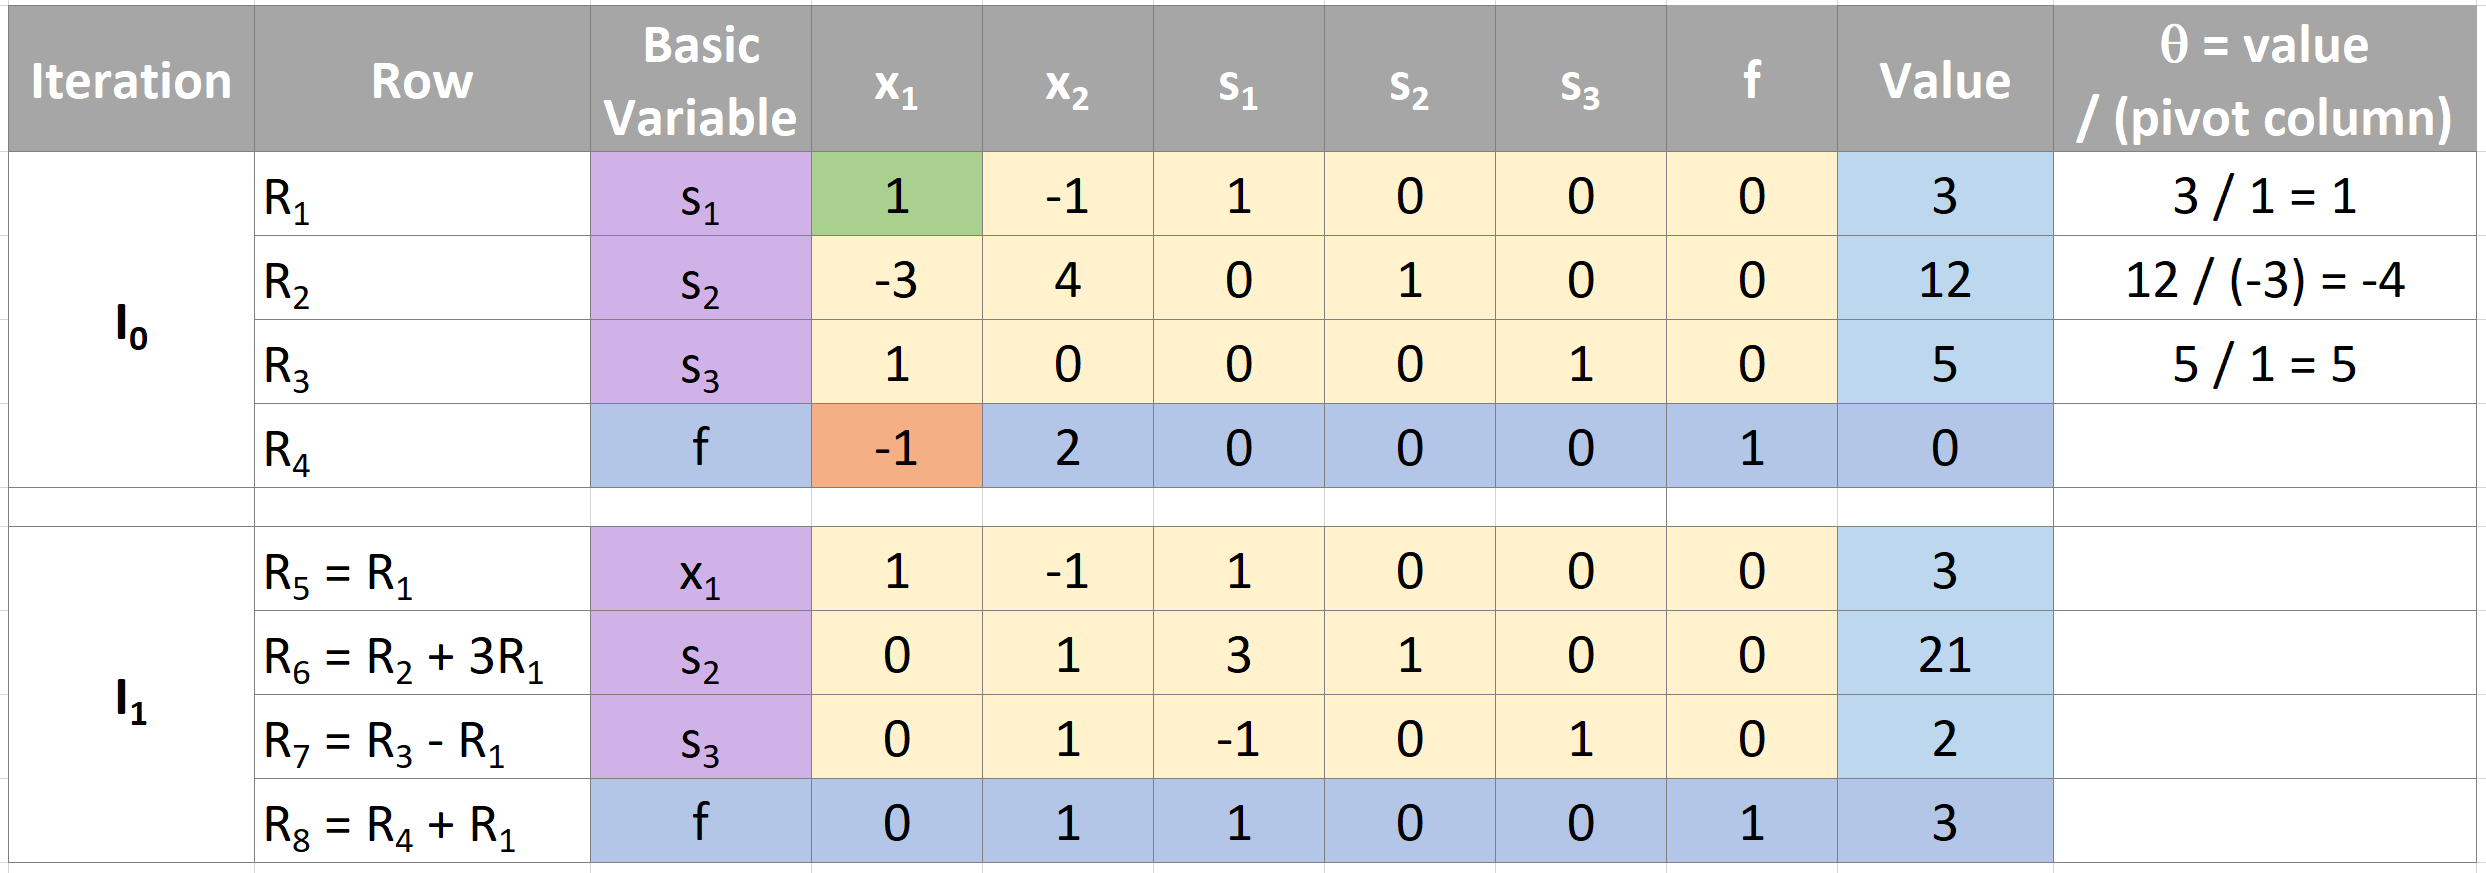

Since all the value in the objective function row are non-negative, we've received the optimal solution of the linear programming problem:
$$
x_1 = 3, x_2 = 0, s_1 = 0, s_2 = 21, s_3 = 2, f = 3.
$$
Or, omiting the slack variables, we receive the solution:
$$
X_{max} = (3, 0), \, F(X_{max}) = 3.
$$

### SciPy linprog

In [7]:
from scipy.optimize import linprog

# coeficients of the objective function
# (since initial task statement is to maximaize the objective function,
# it is necessary to multiply the coeficients by (-1))
obj = [-1, 2]
# left side coeficients of the inequity constraints
lhs_ineq = [
    [1, -1],
    [-3, 4],
    [1, 0]
]
# right sides of the inequity constraints
rhs_ineq = [
    3,
    12,
    5
]

# minimize the objective function
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")

print("x1 = ", opt.x[0])
print("x2 = ", opt.x[1])
# since initial task statement is to maximaize the objective function,
# it is necessary to multiply the result value by (-1)
print("F(x1, x2) = ", (-1) * opt.fun)

x1 =  3.0
x2 =  0.0
F(x1, x2) =  3.0


## Conclusions to Example 1

We've received the same results using the 3 appraches - graphical, simplex, and the `linprog()` Python function:
$$
X_{max} = (3, 0), \, F(X_{max}) = 3.
$$

# Example 2

## Task Statement

Maximize of the following objective function:

$$
F(X)=x_1 + x_2 \rightarrow \max_{X \in G},
$$

where the feasible region $G$ is defined by the constraints:

$$
\begin{cases}
x_1 + 2 x_2 \leqslant 4, \\
2 x_1 - x_2 \leqslant 2,\\
x_1 + x_2 \geqslant 1, \\
2 x_1 - 2 x_2 \leqslant 0, \\
x_1 \geqslant 0, \, x_2 \geqslant 0.
\end{cases}
$$

## Solutions

### Simplex Method

Let convert the LPP to the **standard form**:

$$
F(X)=x_1 + x_2 \rightarrow \max_{X \in G}, \\
\begin{cases}
x_1 + 2 x_2 \leqslant 4, \\
2 x_1 - x_2 \leqslant 2,\\
-x_1 - x_2 \leqslant -1, \\
2 x_1 - 2 x_2 \leqslant 0, \\
x_1 \geqslant 0, \, x_2 \geqslant 0.
\end{cases}
$$

Then, let's write constraints of the LPP in the **canonical form** by adding the **slack variables** (artificial variables):

$$
\begin{cases}
x_1 + 2 x_2 + s_1 = 4,   \\
2 x_1 - x_2 + s_2 = 2,   \\
-x_1 - x_2 + s_3 = -1,   \\
2 x_1 - 2 x_2 + s_4 = 0, \\
\end{cases}                      \\
x_j \geqslant 0, \, j=\overline{1,2}; \, s_k \geqslant 0, \, k=\overline{1,4}.
$$

Also, let's receive an equestion by moving the right part of the objective function to the left:

$$
f = x_1 + x_2, \\
-x_1 - x_2 + f = 0.
$$

As the result, we have the following system of linear equations:

$$
\begin{cases}
x_1 + 2 x_2 + s_1 = 4,   \\
2 x_1 - x_2 + s_2 = 2,   \\
-x_1 - x_2 + s_3 = -1,   \\
2 x_1 - 2 x_2 + s_4 = 0, \\
-x_1 - x_2 + f = 0.
\end{cases}
$$

Now, let's build the simplex table: